### 1. data preprocessing preprocessed the data frames from Gorilla Similarity task
### 2. within_category_similarity_distance use the preprocessed data frame and find the average rating within category
### 3. trialBased_SDperformance find the unique sequence and their percentage correctness (choose only absent block with if statement)
### 4. plot_relationship: combined rating and correctness plot relationsip

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from scipy.stats import pearsonr, t
import seaborn as sns

In [2]:
#Everyday/Complex Tone: Function to find mean and min distances
def calculate_distances(sequence, switch, distance_data):
    # Split the sequence string into a list and remove any leading/trailing spaces from each element
    sequence_list = [item.strip() for item in sequence.split(',')]

    # Ensure switch is a valid index
    if switch not in [0.0, 1.0, 2.0] or switch >= len(sequence_list) - 1:
        return "Invalid switch value or sequence too short"

    # Extract the relevant elements based on the switch value
    note_a = sequence_list[int(switch)]
    note_b = sequence_list[int(switch) + 1]

    # Search for distance data in both AB and BA order
    ab_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_a}.wav") & (distance_data['Spreadsheet: B'] == f"{note_b}.wav")]
    ba_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_b}.wav") & (distance_data['Spreadsheet: B'] == f"{note_a}.wav")]

    # Initialize variables to store distances
    ab_distance = ba_distance = None

    # Check if AB order distance is available
    if not ab_row.empty:
        ab_distance = ab_row['Similarity_Distance'].iloc[0]

    # Check if BA order distance is available
    if not ba_row.empty:
        ba_distance = ba_row['Similarity_Distance'].iloc[0]

    # Calculate average distance if both distances are available, else take the available one
    if ab_distance is not None and ba_distance is not None:
        average_distance = (ab_distance + ba_distance) / 2
        return average_distance
    elif ab_distance is not None:
        return ab_distance
    elif ba_distance is not None:
        return ba_distance
    else:
        return "N/A"

# Cat Meows ONlY; Function to find mean and min distances
def calculate_distances2(sequence, switch, distance_data):
    # Split the sequence string into a list and remove any leading/trailing spaces from each element
    sequence_list = [item.strip().split('_', 1)[0] for item in sequence.split(',')]

    # Ensure switch is a valid index
    if switch not in [0.0, 1.0, 2.0] or switch >= len(sequence_list) - 1:
        return "Invalid switch value or sequence too short"

    # Extract the relevant elements based on the switch value
    note_a = sequence_list[int(switch)]
    note_b = sequence_list[int(switch) + 1]

    # Retrieve distances for both AB and BA orders
    ab_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_a}_300ms.wav") & (distance_data['Spreadsheet: B'] == f"{note_b}_300ms.wav")]
    ba_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_b}_300ms.wav") & (distance_data['Spreadsheet: B'] == f"{note_a}_300ms.wav")]

    # Initialize variables to store distances
    ab_distance = ba_distance = None

    # Check if AB order distance is available
    if not ab_row.empty:
        ab_distance = ab_row['Similarity_Distance'].iloc[0]

    # Check if BA order distance is available
    if not ba_row.empty:
        ba_distance = ba_row['Similarity_Distance'].iloc[0]

    # Calculate average distance if both distances are available, else take the available one
    if ab_distance is not None and ba_distance is not None:
        average_distance = (ab_distance + ba_distance) / 2
        return average_distance
    elif ab_distance is not None:
        return ab_distance
    elif ba_distance is not None:
        return ba_distance
    else:
        return "N/A"

def plot_distances1(filtered_df_everyday, filtered_df_complexTone):
    # Plot for Distance
    plt.scatter(filtered_df_everyday['Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone['Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_distances2(filtered_df_cat, filtered_df_complexTone):
    # Plot for Distance
    plt.scatter(filtered_df_cat['Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone['Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_distances_combined(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Plot for Distance
    plt.scatter(filtered_df_everyday['Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone1['Distance'], filtered_df_complexTone1['Correctness'], color='lightcoral', label='ComplexTone1')
    plt.scatter(filtered_df_cat['Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone2['Distance'], filtered_df_complexTone2['Correctness'], color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Plot for Distance
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_distances_2x2_subplots(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    plt.figure(figsize=(12, 12))

    # Subplot for ComplexTone1
    plt.subplot(2, 2, 1)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('ComplexTone1: Correctness vs. Distance')
    plt.legend()

    # Subplot for Everyday
    plt.subplot(2, 2, 2)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Everyday: Correctness vs. Distance')
    plt.legend()

    # Subplot for Cat
    plt.subplot(2, 2, 3)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Cat: Correctness vs. Distance')
    plt.legend()

    # Subplot for ComplexTone2
    plt.subplot(2, 2, 4)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('ComplexTone2: Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def modified_plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Combine all dataframes for overall regression
    combined_df = pd.concat([filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2])
    
    plt.figure(figsize=(8, 8))

    # Plotting individual datasets with scatter and regression lines without confidence bands
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday', ci=None)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1', ci=None)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat', ci=None)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2', ci=None)

    # Plotting the combined regression line with a confidence band
    #sns.regplot(x='Distance', y='Correctness', data=combined_df, color='black', scatter=False, ci=95, line_kws={"color": "black"})

    plt.xlim([0, 5.5])
    plt.ylim([0, 1.1])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    #plt.legend()

    plt.tight_layout()
    save_path = os.path.join('/Users/willmacbookair/Downloads/Poster plot', "different_relationship.svg")
    # save the plot
    plt.savefig(save_path, format='svg')
    plt.show()

def calculate_and_print_correlation(df, distance_type):
    # Extract category from dataframe variable name
    category = df.name.split('_')[-1]  # Assuming the df has a 'name' attribute set

    # Calculate Pearson correlation
    corr, _ = pearsonr(df[distance_type], df['Correctness'])
    
    # Calculate t-value and p-value
    n = len(df) 
    t_value = corr * np.sqrt((n - 2) / (1 - corr**2))
    df_degrees = n - 2
    p_value = 2 * (1 - t.cdf(np.abs(t_value), df_degrees))

    # Print results
    print(f"r ({category} - {distance_type}): {corr:.3f}, t-value: {t_value:.3f}, p-value: {p_value:.3f}, dof: {df_degrees}")


### Plot the relation sequence correctness and similarity distance 

#### Experiment 2a everyday sound & complex tones

In [3]:
# Everyday Sound
# distance metric
distanceED= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_everydaySound.csv"
# everyday sound
everydayCorrectness = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9. Similarity in SD task/Everyday_CompexTone_result/correctness_other.csv"

# Reading the CSV files
distance_df = pd.read_csv(distanceED)
correctness_df = pd.read_csv(everydayCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_everyday = pd.DataFrame(results)
print(results_df_everyday)
# Filter out the rows where distance is -1
filtered_df_everyday = results_df_everyday[(results_df_everyday['Distance'] != -1)]
print(filtered_df_everyday)



                                             Sequence  Switch  Correctness  \
0    baby_3ms, car_horn_3ms, car_engine_3ms, frog_3ms     2.0        0.650   
1   baby_3ms, drink_water_3ms, phone_ring_3ms, sno...     0.0        0.675   
2      baby_3ms, snore_3ms, laugh_3ms, car_engine_3ms     1.0        0.500   
3     bell_3ms, baby_3ms, sizzling_pan_3ms, cough_3ms     2.0        0.500   
4   cough_3ms, snore_3ms, brush_teeth_3ms, sizzlin...     0.0        0.750   
5   drink_water_3ms, brush_teeth_3ms, frog_3ms, fo...     0.0        0.475   
6   drink_water_3ms, frog_3ms, sizzling_pan_3ms, m...     1.0        0.425   
7   drink_water_3ms, sizzling_pan_3ms, car_engine_...     1.0        0.375   
8   drink_water_3ms, sizzling_pan_3ms, phone_ring_...     0.0        0.275   
9   foot_step_3ms, sheep_3ms, frog_3ms, car_engine...     0.0        0.700   
10  frog_3ms, foot_step_3ms, drink_water_3ms, sizz...     1.0        0.350   
11  laugh_3ms, brush_teeth_3ms, sizzling_pan_3ms, ...     2.0   

In [4]:
# Complex Tones 
# distance metric
distanceCT= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_complexTone2.csv"
# complex tone
complexToneCorrectness = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9. Similarity in SD task/Everyday_CompexTone_result/correctness_complexTone.csv'

# Reading the CSV files
distance_df = pd.read_csv(distanceCT)
correctness_df = pd.read_csv(complexToneCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_complexTone = pd.DataFrame(results)
filtered_df_complexTone1 = results_df_complexTone[(results_df_complexTone['Distance'] != -1)]
print(filtered_df_complexTone1)

                         Sequence  Switch  Correctness  Distance
0        A#4_Bb4, C4, F4, C#4_Db4     2.0        0.950  2.827778
1        A#4_Bb4, D4, B4, G#4_Ab4     2.0        0.950  2.898810
2             B4, D4, G#4_Ab4, D5     2.0        0.975  2.361111
3        C#5_Db5, C4, F#4_Gb4, B4     2.0        0.975  2.232955
4        C#5_Db5, C5, F#4_Gb4, B4     1.0        0.775  2.187500
5   C#5_Db5, D#4_Eb4, F4, A#4_Bb4     0.0        0.900  1.274725
6        C4, F#4_Gb4, G4, G#4_Ab4     2.0        0.950  3.550000
7             C4, G4, F4, C#5_Db5     1.0        0.650  2.861111
8             C5, G#4_Ab4, A4, C4     0.0        0.950  2.566667
9        D#4_Eb4, C5, E4, C#4_Db4     0.0        0.875  1.803571
10       D#5_Eb5, F4, A4, A#4_Bb4     1.0        0.600  2.600000
11       D4, F#4_Gb4, F4, C#5_Db5     0.0        0.800  2.517857
12            D5, A#4_Bb4, C4, C5     1.0        0.625  1.398810
13            D5, F#4_Gb4, G4, E4     1.0        0.750  3.666667
14            E4, D4, D5,

#### correlation analysis 

In [5]:
##
filtered_df_everyday.name = 'filtered_df_everyday'
filtered_df_complexTone1.name = 'filtered_df_complexTone'

calculate_and_print_correlation(filtered_df_everyday, 'Distance')
calculate_and_print_correlation(filtered_df_complexTone1, 'Distance')


# For combined data
combined_df_mean = pd.concat([filtered_df_everyday[['Distance', 'Correctness']], 
                              filtered_df_complexTone1[['Distance', 'Correctness']]])
combined_df_mean.name = 'combined_df_distance'
calculate_and_print_correlation(combined_df_mean, 'Distance')

r (everyday - Distance): -0.564, t-value: -2.733, p-value: 0.015, dof: 16
r (complexTone - Distance): -0.108, t-value: -0.433, p-value: 0.671, dof: 16
r (distance - Distance): 0.346, t-value: 2.148, p-value: 0.039, dof: 34


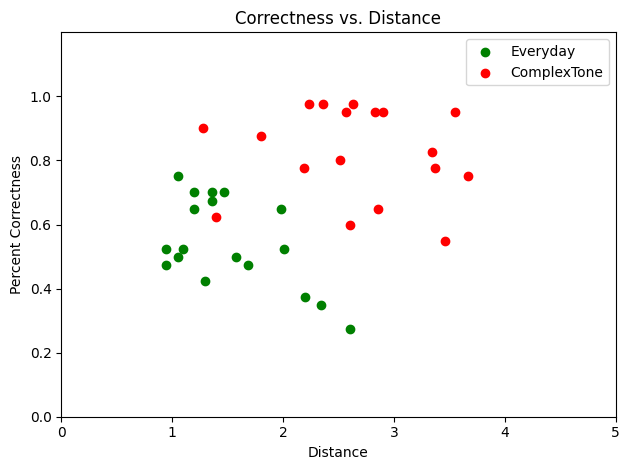

In [6]:
plot_distances1(filtered_df_everyday, filtered_df_complexTone1)

#### Cat Meows vs Complex Tones

In [7]:
# Cat Meows
# distance metric
distanceCM= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_catMeow.csv"
# cat meows
catmeowCorrectness = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9. Similarity in SD task/Cat_CompexTone_result/correctness_other.csv"

# Reading the CSV files
distance_df = pd.read_csv(distanceCM)
correctness_df = pd.read_csv(catmeowCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances2(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_cat = pd.DataFrame(results)
#print(results_df_everyday)
# Filter out the rows where distance is -1
filtered_df_cat = results_df_cat[(results_df_cat['Distance'] != -1)]
print(filtered_df_cat)

                                             Sequence  Switch  Correctness  \
0   11_500ms-changeduration_Stretch__0_3, 18_500ms...     1.0     0.487805   
1   11_500ms-changeduration_Stretch__0_3, 18_500ms...     1.0     0.463415   
2   11_500ms-changeduration_Stretch__0_3, 1_500ms-...     2.0     0.926829   
3   18_500ms-changeduration_Stretch__0_3, 17_500ms...     2.0     0.756098   
4   18_500ms-changeduration_Stretch__0_3, 8_500ms-...     2.0     0.487805   
5   1_500ms-changeduration_Stretch__0_3, 11_500ms-...     1.0     0.268293   
6   1_500ms-changeduration_Stretch__0_3, 18_500ms-...     2.0     0.707317   
7   1_500ms-changeduration_Stretch__0_3, 24_500ms-...     2.0     0.731707   
8   1_500ms-changeduration_Stretch__0_3, 25_500ms-...     2.0     0.560976   
9   1_500ms-changeduration_Stretch__0_3, 26_500ms-...     1.0     0.317073   
10  24_500ms-changeduration_Stretch__0_3, 17_500ms...     0.0     0.536585   
11  24_500ms-changeduration_Stretch__0_3, 26_500ms...     0.0   

In [8]:
# Complex Tones
# distance metric
distanceCT= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_complexTone2.csv"
# complex tone
complexToneCorrectness = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9. Similarity in SD task/Cat_CompexTone_result/correctness_complexTone.csv'

# Reading the CSV files
distance_df = pd.read_csv(distanceCT)
correctness_df = pd.read_csv(complexToneCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_complexTone = pd.DataFrame(results)
filtered_df_complexTone2 = results_df_complexTone[(results_df_complexTone['Distance'] != -1)]
print(filtered_df_complexTone2)

                         Sequence  Switch  Correctness  Distance
0        A#4_Bb4, A4, F4, C#4_Db4     2.0     0.902439  2.827778
1        A#4_Bb4, D5, C5, F#4_Gb4     1.0     0.951220  3.096154
2             A4, D#4_Eb4, C4, D4     0.0     0.902439  2.119318
3             B4, C#4_Db4, D4, G4     0.0     0.902439  1.316667
4        C#4_Db4, C4, D5, A#4_Bb4     1.0     1.000000  0.960227
5   C#4_Db4, E4, C#5_Db5, D#5_Eb5     2.0     0.926829  3.732955
6             C#5_Db5, B4, F4, A4     2.0     0.951220  2.600000
7        C#5_Db5, C4, C5, D#4_Eb4     2.0     0.975610  1.803571
8   C#5_Db5, C4, D#5_Eb5, A#4_Bb4     0.0     0.829268  0.722222
9        D#5_Eb5, C#5_Db5, C4, B4     1.0     0.829268  0.722222
10                 D5, A4, D4, F4     0.0     0.902439  2.357143
11  D5, D#5_Eb5, C#5_Db5, G#4_Ab4     1.0     0.902439  3.732955
12            E4, A4, G#4_Ab4, F4     2.0     0.902439  3.100000
13            E4, C4, A#4_Bb4, B4     0.0     0.634146  2.965909
14       F#4_Gb4, C4, B4,

#### correlation analysis 

In [9]:
filtered_df_cat.name = 'filtered_df_cat'
filtered_df_complexTone2.name = 'filtered_df_complexTone'
calculate_and_print_correlation(filtered_df_cat, 'Distance')
calculate_and_print_correlation(filtered_df_complexTone2, 'Distance')

# For combined data
combined_df_mean = pd.concat([filtered_df_cat[['Distance', 'Correctness']], 
                              filtered_df_complexTone2[['Distance', 'Correctness']]])
combined_df_mean.name = 'combined_df'
calculate_and_print_correlation(combined_df_mean, 'Distance')


r (cat - Distance): 0.116, t-value: 0.468, p-value: 0.646, dof: 16
r (complexTone - Distance): -0.042, t-value: -0.167, p-value: 0.869, dof: 16
r (df - Distance): 0.032, t-value: 0.185, p-value: 0.854, dof: 34


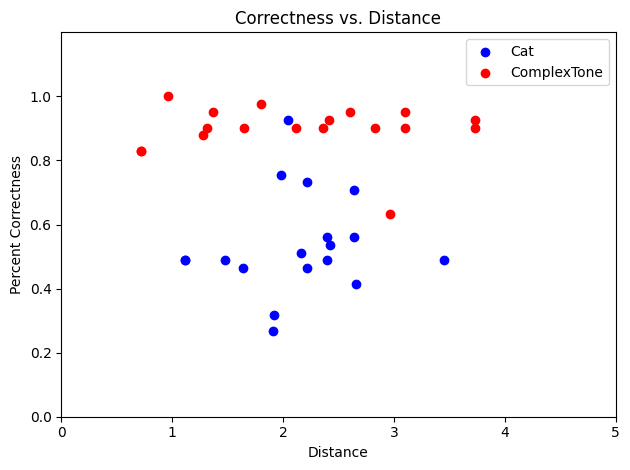

In [10]:
plot_distances2(filtered_df_cat, filtered_df_complexTone2)

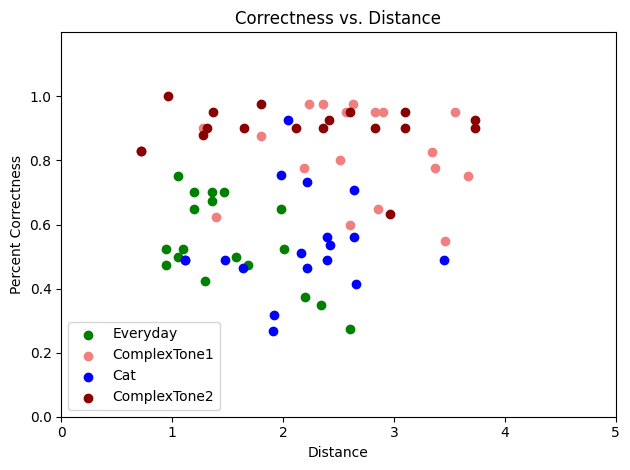

In [11]:
plot_distances_combined(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

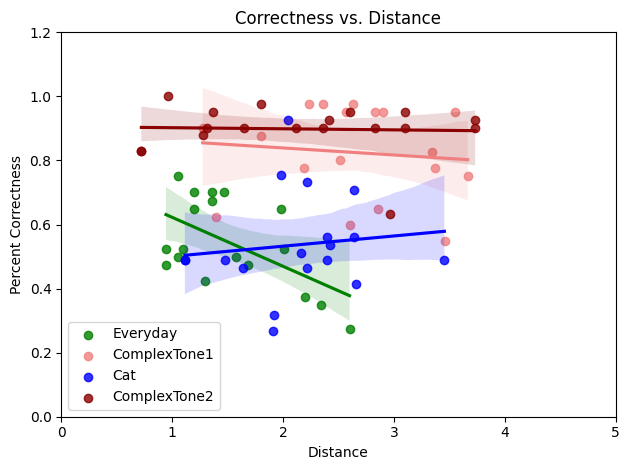

In [12]:
plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

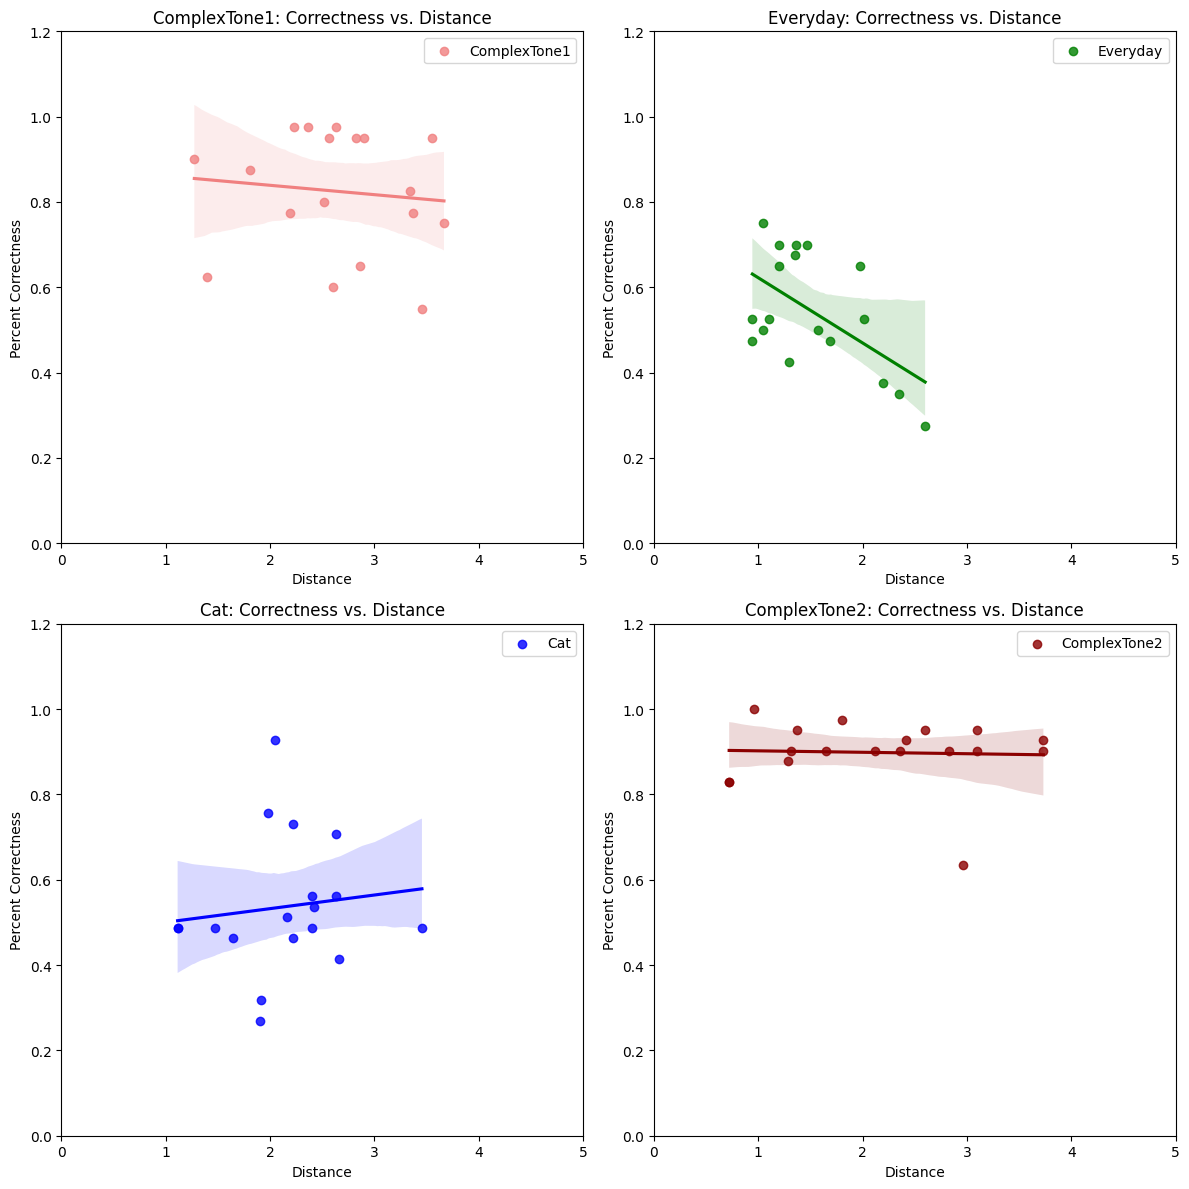

In [13]:
plot_distances_2x2_subplots(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

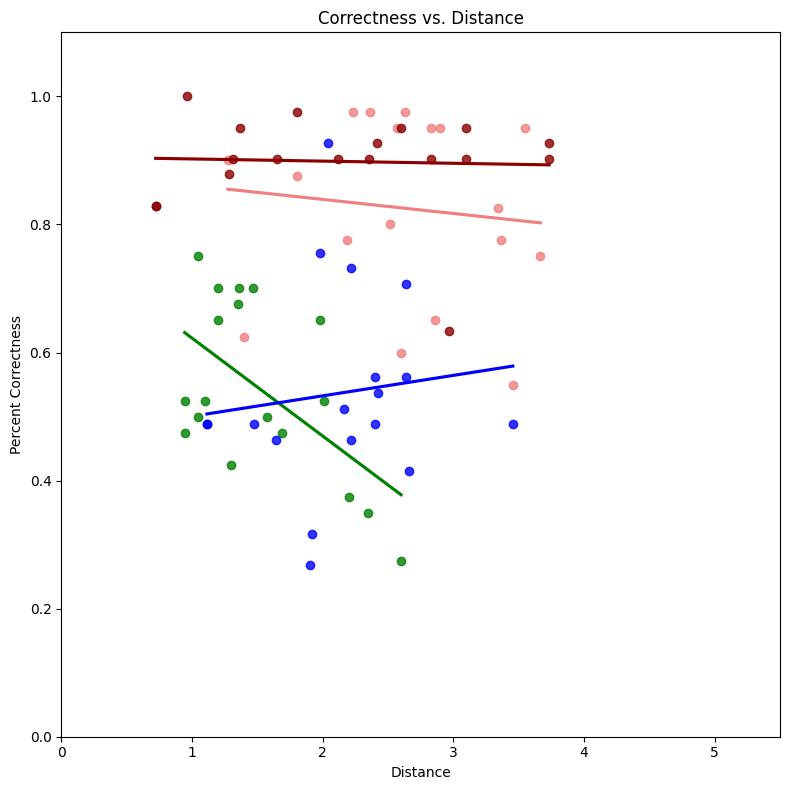

In [14]:
modified_plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)